In [27]:
from sequenzo import *
import pandas as pd
import numpy as np
import hdbscan

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"])

happiness_sequence = SequenceData(data=happiness_df,
                                  time_type='age',
                                  time=time_cols,
                                  states=[1, 2, 3, 4, 5],
                                  labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])

distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                             method='OM',
                                             sm="CONSTANT",
                                             indel=1)

distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                method='OM',
                                                sm="CONSTANT",
                                                indel=1)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3]

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3, 4, 5]
[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.
[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


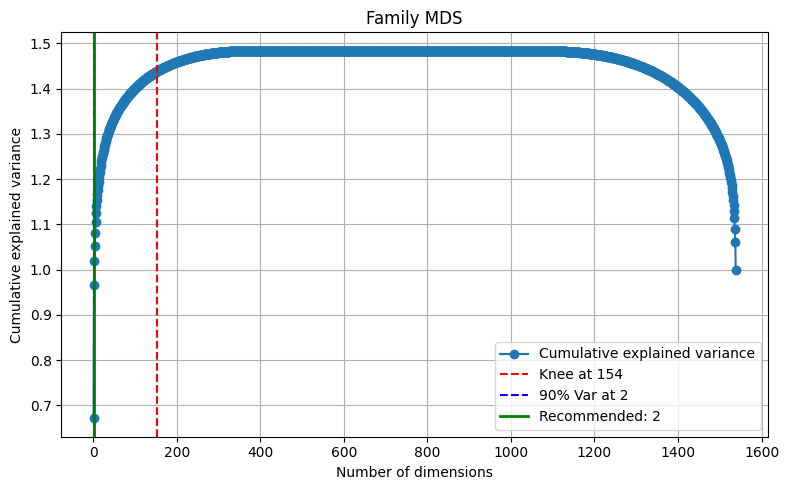

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö 154


In [28]:
# MDS Â§ÑÁêÜ
X_family, eigvals_family = cmdscale(distance_matrix_family)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_family = result_family['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö", 154)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_family_optimal = X_family[:, :optimal_dim_family]

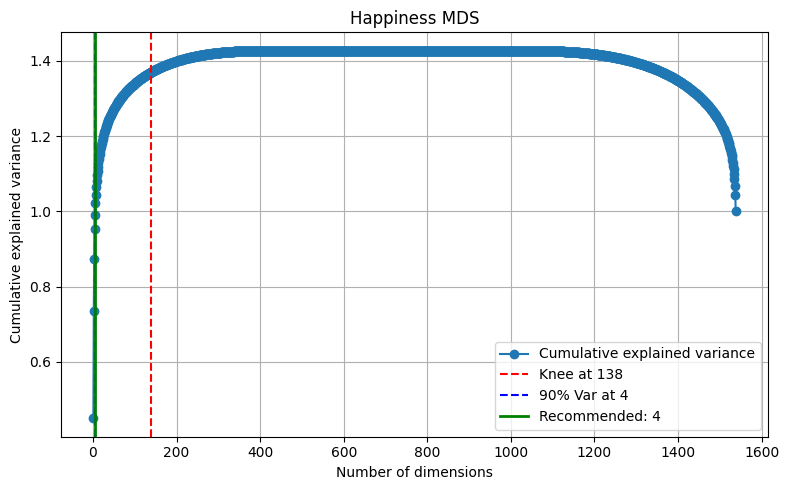

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö 4


In [29]:
# MDS Â§ÑÁêÜ
X_happiness, eigvals_family = cmdscale(distance_matrix_happiness)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_happiness = find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_happiness['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö", optimal_dim_happiness)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_happiness_optimal = X_happiness[:, :optimal_dim_happiness]

In [30]:
# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])

X_concat

array([[  6.24666033,  -9.28138676,  21.45770245,  -7.6285609 ,
         -5.12213136,  -0.88228859],
       [ -0.46749734,   8.89624178,  -9.74062455,   1.4944408 ,
         -5.8677293 ,   0.37050103],
       [ 13.08022268,  24.21172408,  18.74999275,  -2.97155639,
         -4.83343908,  -0.94593589],
       ...,
       [ 13.06893513, -11.31647467,  18.1053298 ,  13.30229324,
         -4.82003376,   0.91814791],
       [  4.71125719, -15.09687014,   8.99526832,  15.97412132,
         -3.0628969 ,   1.17215033],
       [  5.79239798, -11.39672734,   4.79371934,  12.44118037,
         12.79289395, -14.13558289]])

## Cluster analysis

In [31]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(X_concat)

# Áúã‰∏Ä‰∏ãËÅö‰∫ÜÂá†‰∏™ cluster
print(np.unique(cluster_labels, return_counts=True))

(array([-1,  0,  1,  2,  3]), array([1150,  102,   67,  131,   88]))


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
# ÊûÑÂª∫ DataFrame Áî®‰∫é plot
hdbscan_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

hdbscan_df

ID  Cluster ID
0        1          -1
1        2          -1
2        5          -1
3        6          -1
4        7          -1
...    ...         ...
1533  1992           2
1534  1995          -1
1535  1996          -1
1536  1997          -1
1537  1999          -1

[1538 rows x 2 columns]

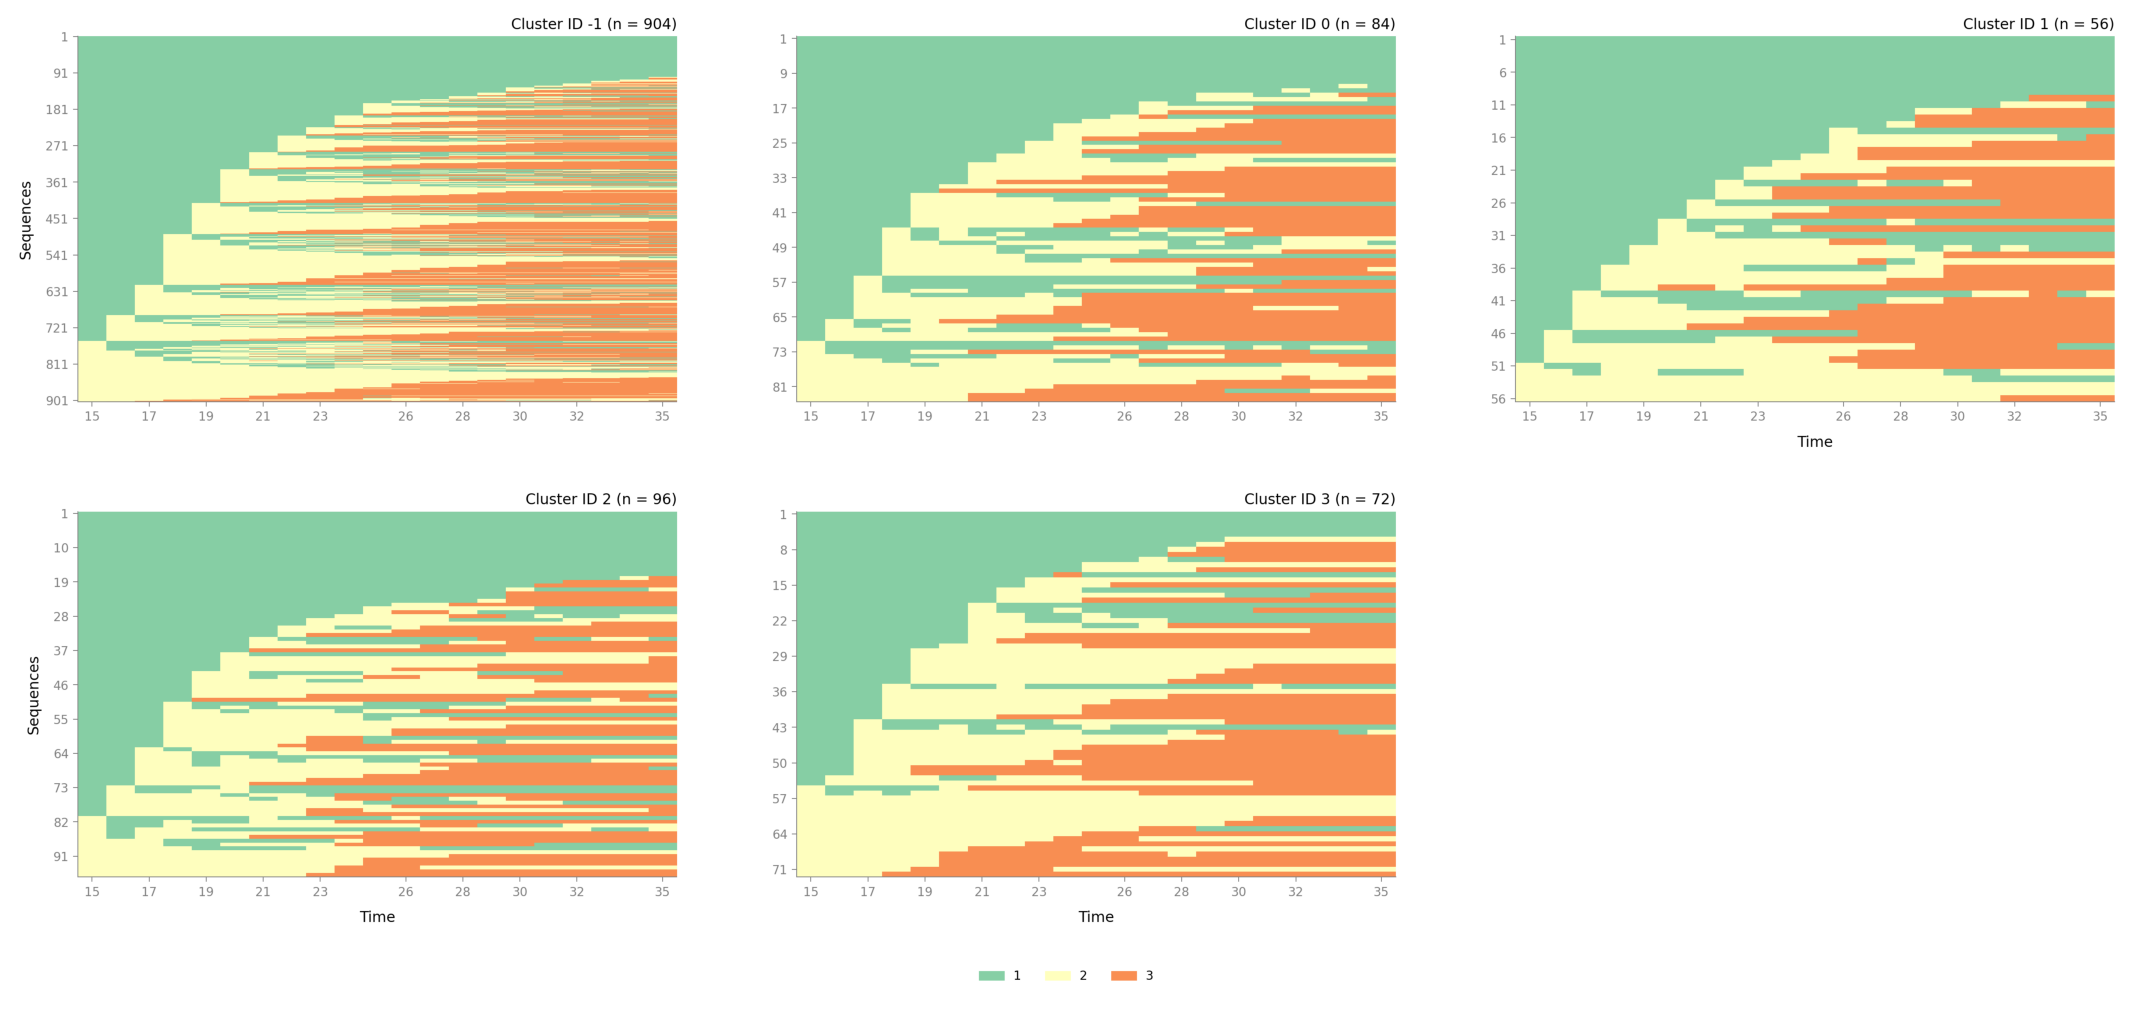

In [34]:
# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_family_plot')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_happiness_plot')

TypeError: keywords must be strings

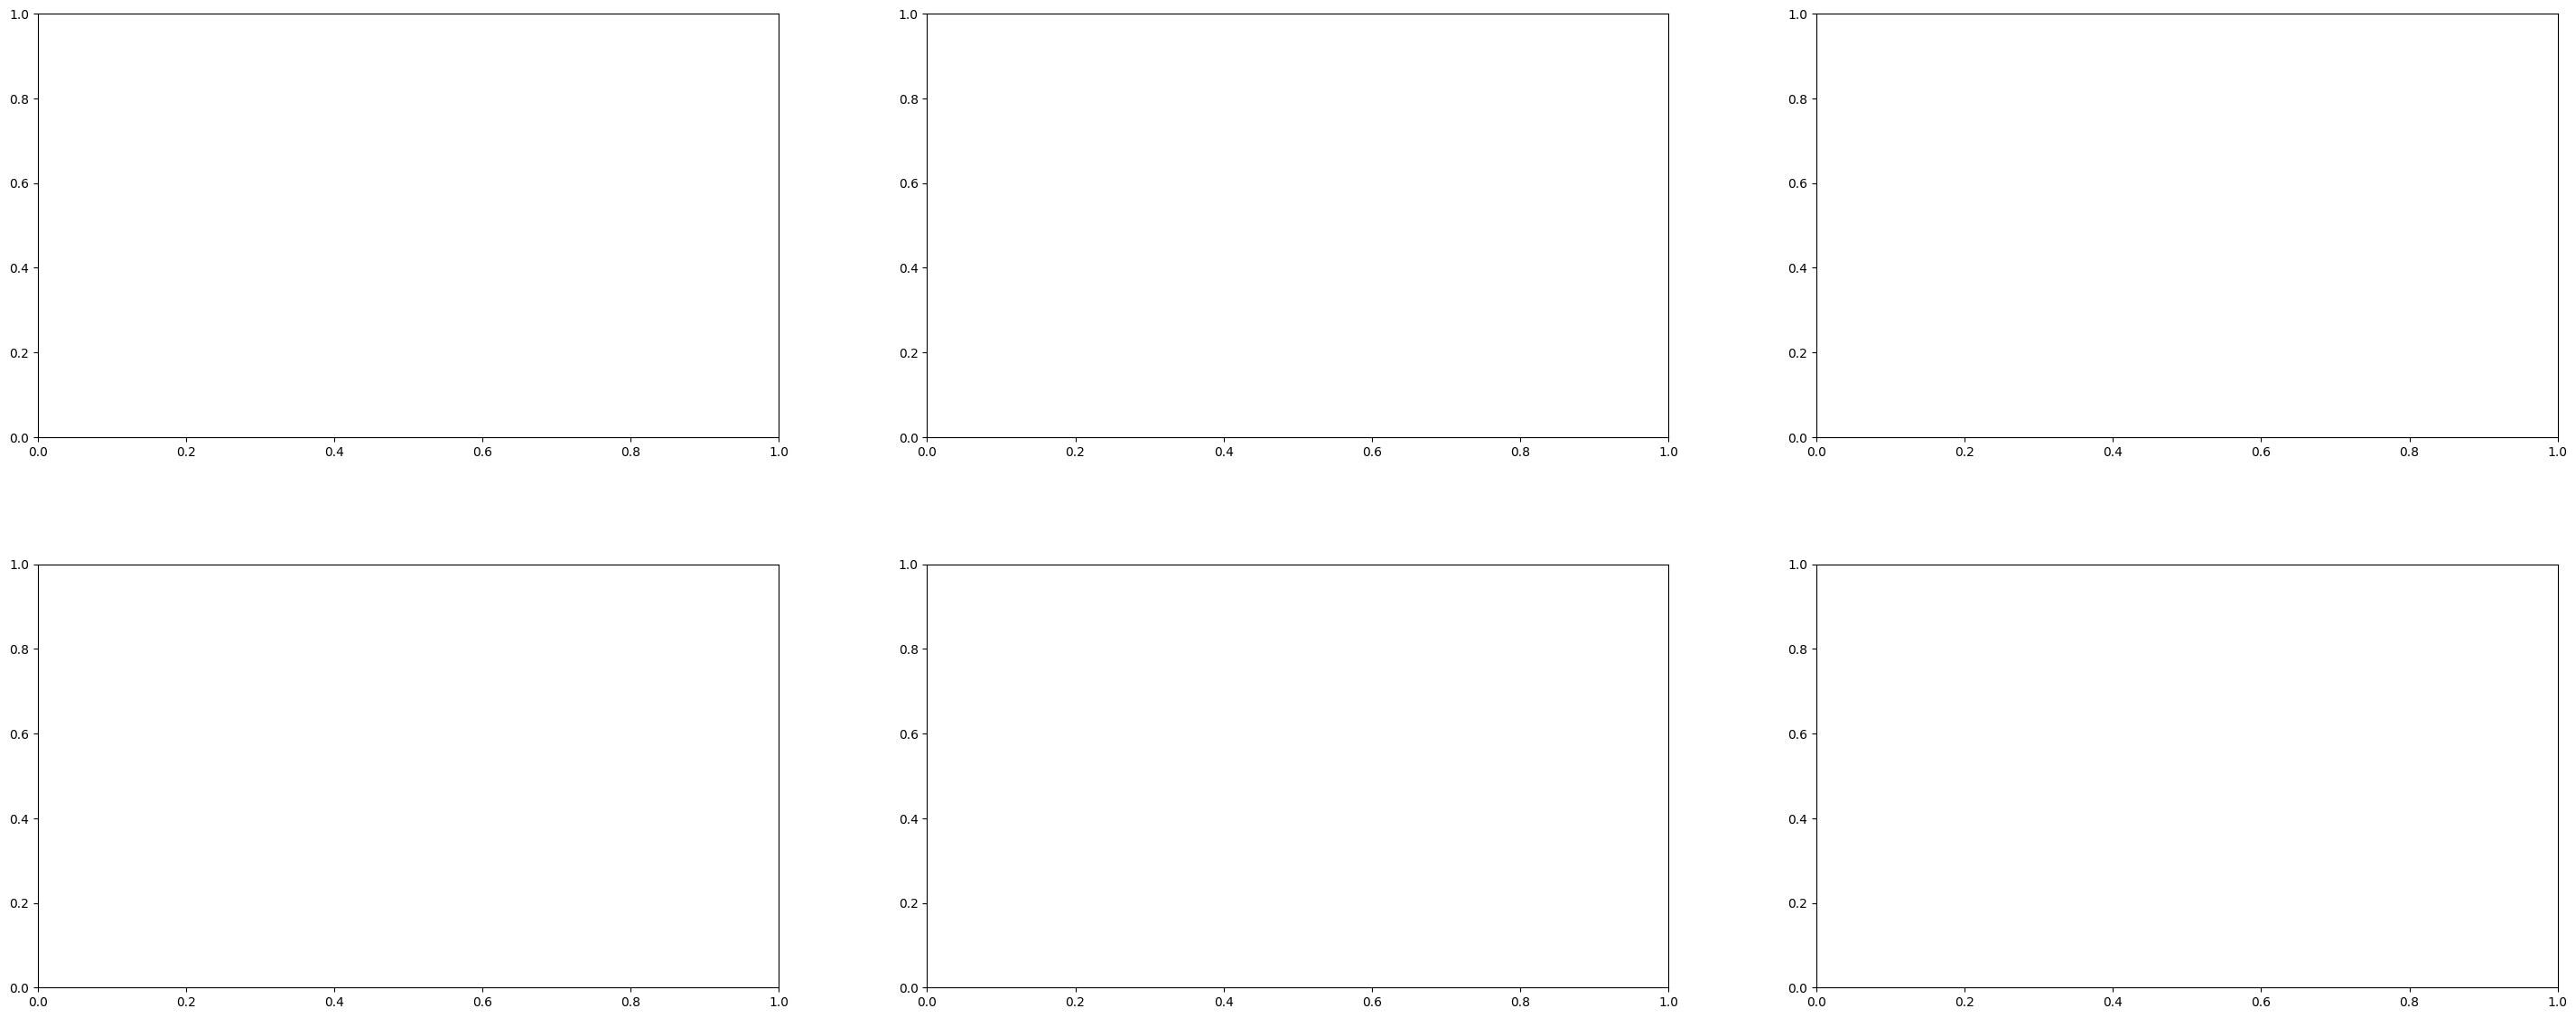

In [35]:
# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_state_distribution(seqdata=family_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_family_plot_distribution')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_state_distribution(seqdata=happiness_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    save_as='hdbscan_happiness_plot_distribution')

ÂâîÈô§noiseÂÜçËßÇÂØü

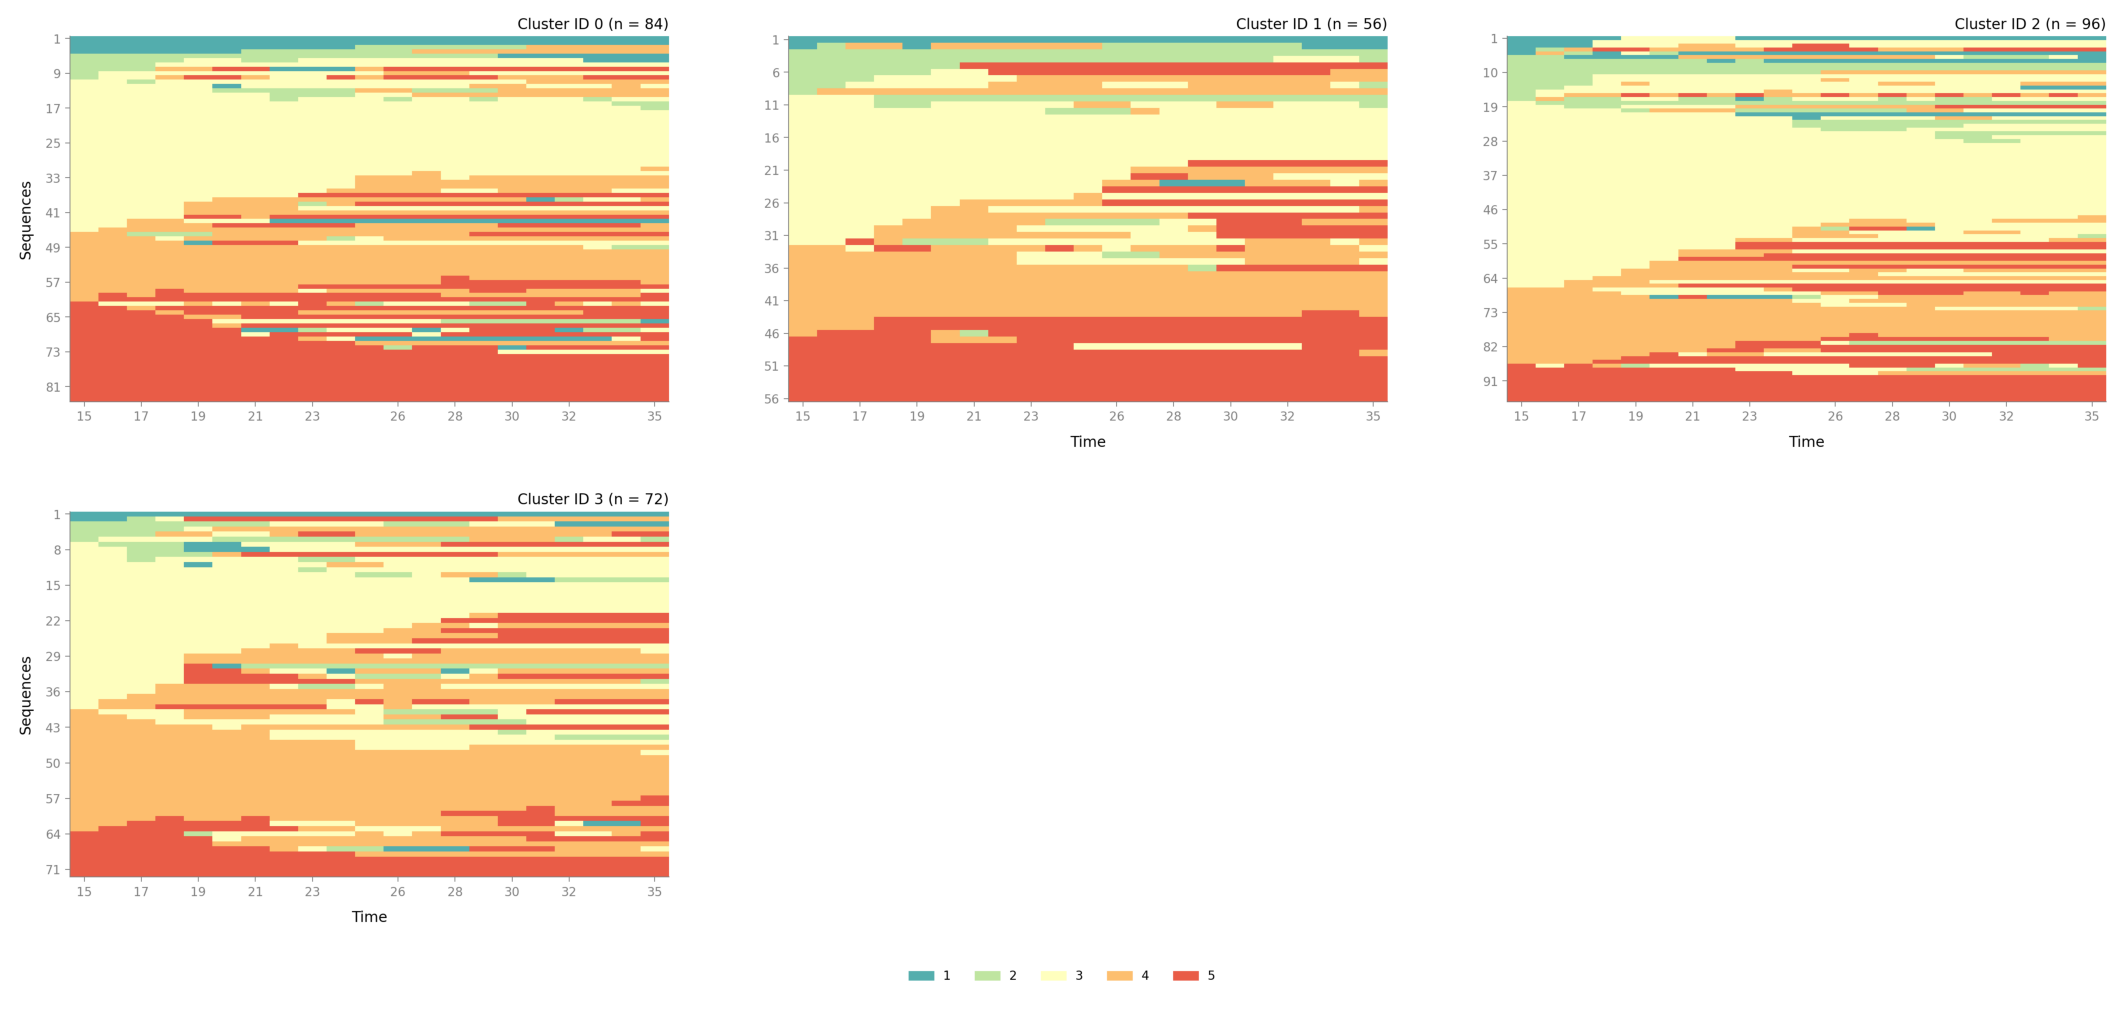

In [16]:
# ‰ªÖ‰øùÁïôÊúâÊïà cluster
valid_cluster_df = hdbscan_df[hdbscan_df['Cluster ID'] != -1]

# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_family_plot_no_noise')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_happiness_plot_no_noise')

soft assignmentÔºåÈÅøÂÖç noise Ê≤°ÊúâÂèØËß£ÈáäÊÄß

In [17]:
import hdbscan
import numpy as np

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, prediction_data=True)
labels = clusterer.fit_predict(X_concat)

# soft assignment: ÊØè‰∏ÄË°åÊòØ‰∏Ä‰∏™‰∫∫ÂØπÊâÄÊúâ cluster ÁöÑÂΩíÂ±ûÊ¶ÇÁéá
soft_probs = hdbscan.all_points_membership_vectors(clusterer)

# ÊúÄÂèØËÉΩÁöÑÈÇ£‰∏™ clusterÔºå‰Ωú‰∏∫ final labelÔºàÂåÖÊã¨ÂéüÊú¨ÁöÑ noiseÔºâ
soft_labels = np.argmax(soft_probs, axis=1)


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
import pandas as pd

soft_df = pd.DataFrame({
    "ID": family_df["ID"],  # Êàñ happiness_df["ID"]
    "Cluster ID": soft_labels
})

soft_df

ID  Cluster ID
0        1           0
1        2           3
2        5           0
3        6           2
4        7           3
...    ...         ...
1533  1992           2
1534  1995           0
1535  1996           1
1536  1997           1
1537  1999           1

[1538 rows x 2 columns]

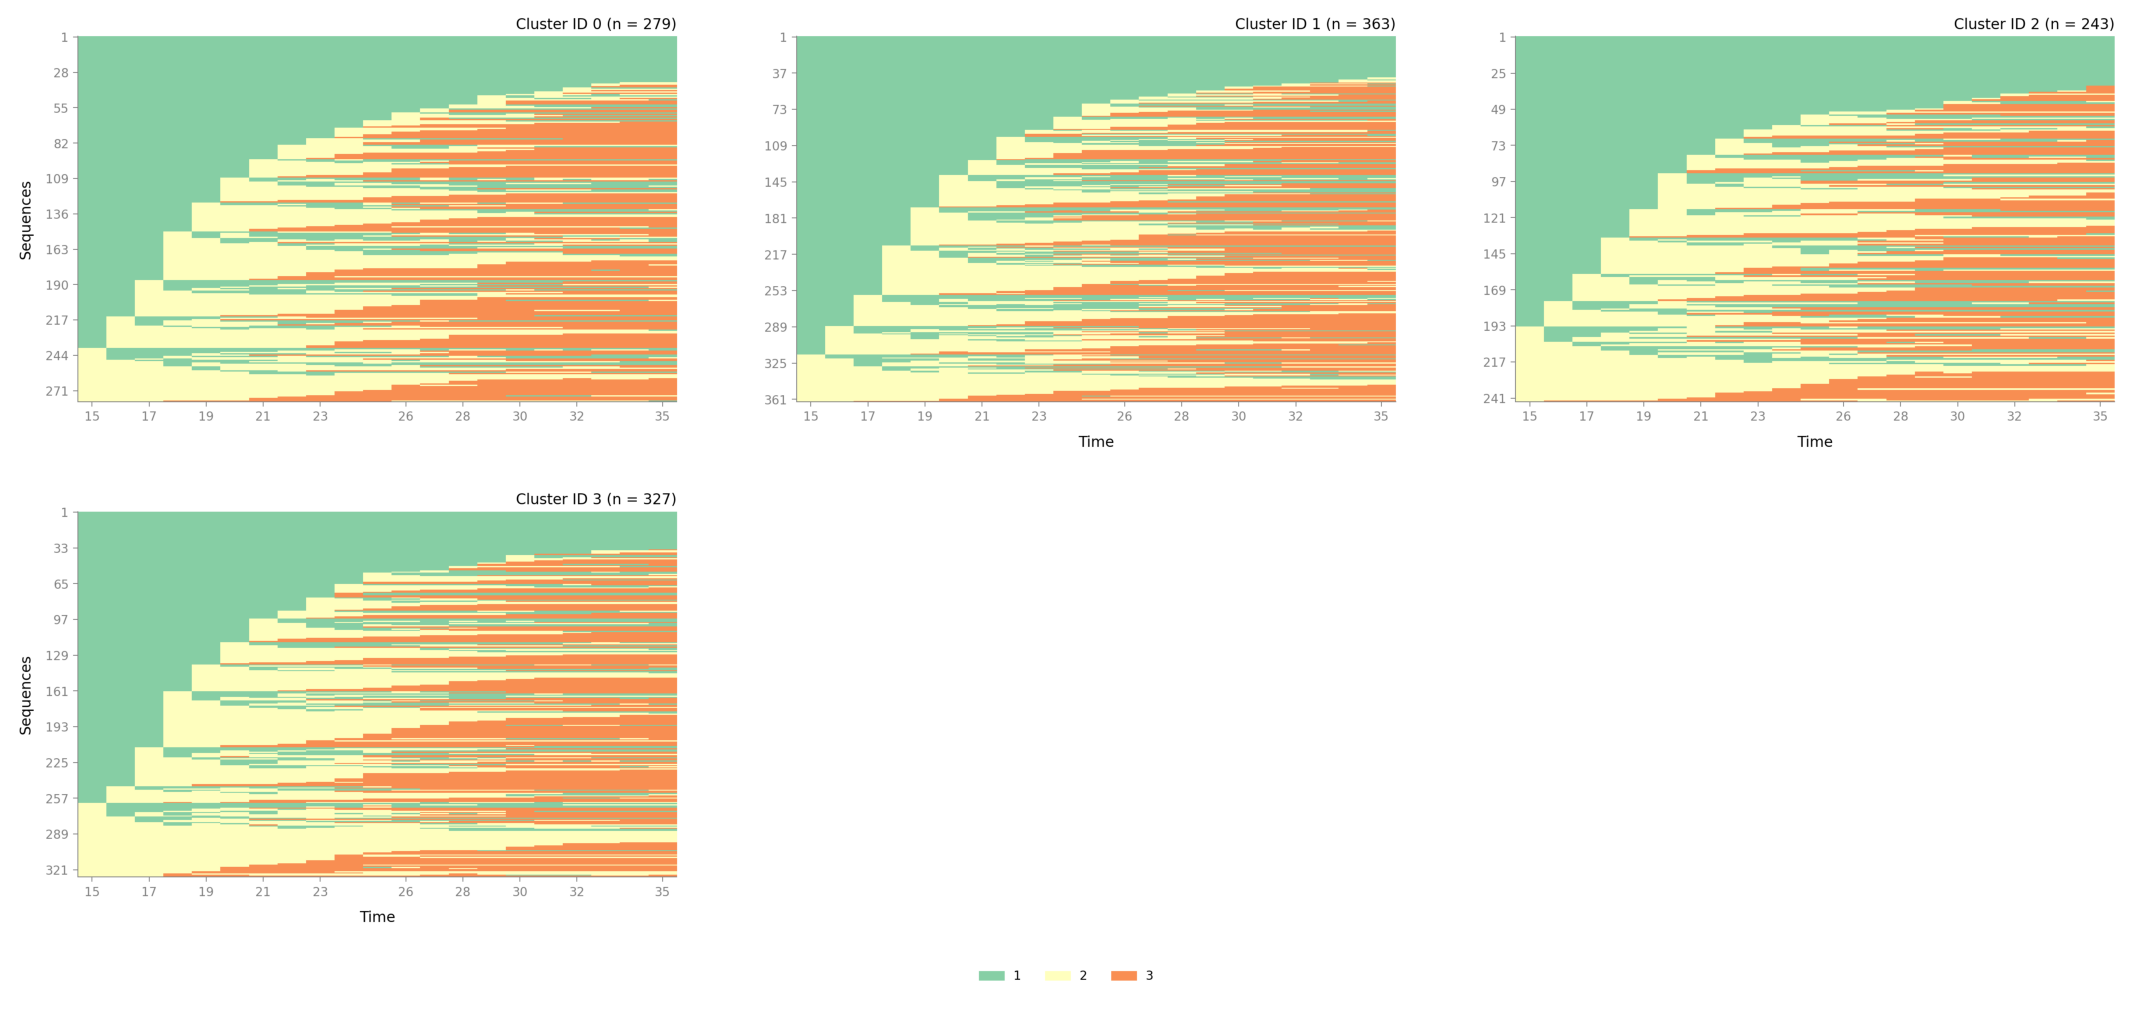

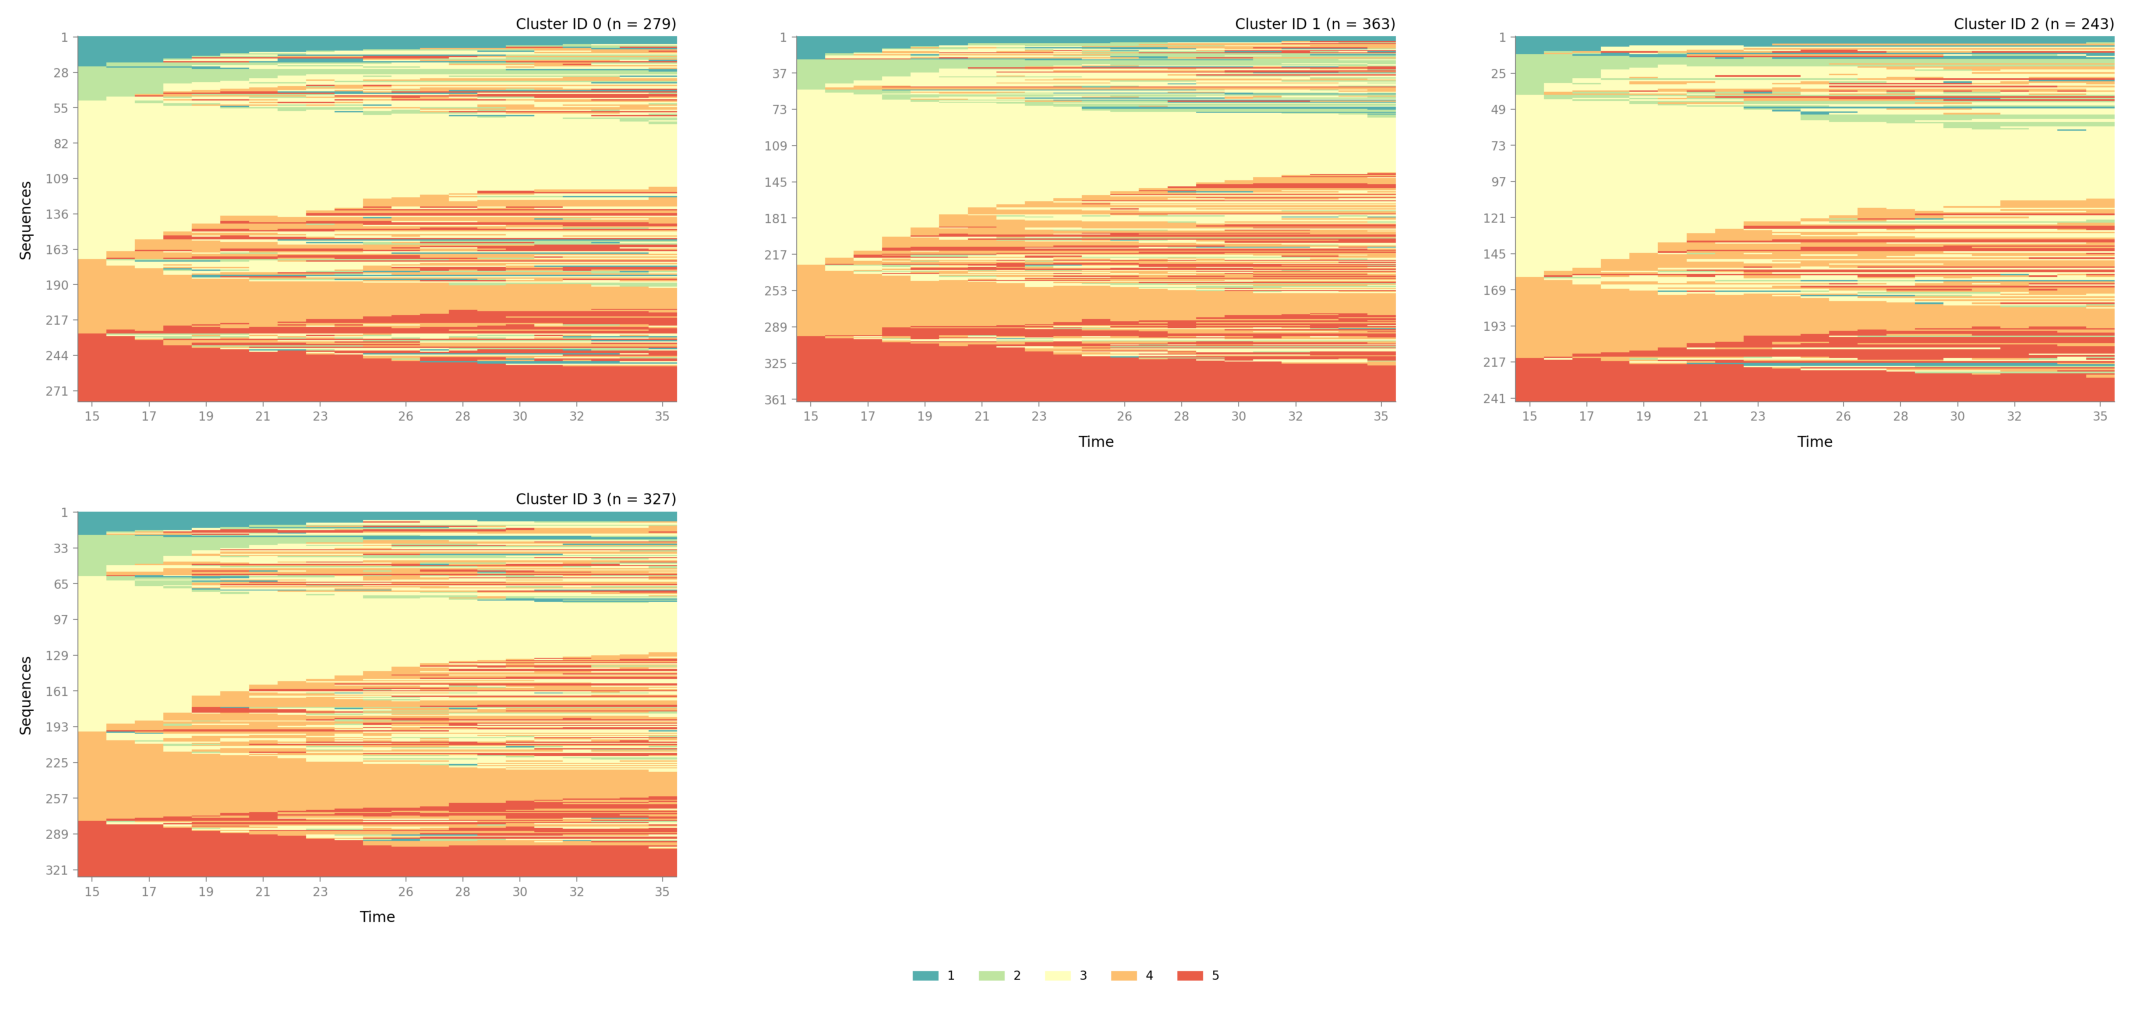

In [20]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_family_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_happiness_plot')


‰Ω†ÁöÑ‰∏§‰∏™ÈóÆÈ¢òÈÉΩÈóÆÂæóÁâπÂà´Á≤æÂáÜÔºåÂÆåÂÖ® hit Âà∞‰∫ÜÁî® HDBSCAN + soft assignment ÁöÑÊ†∏ÂøÉÁüõÁõæ„ÄÇÊàë‰ª¨‰∏ÄËµ∑Êù•ÊãÜËß£Ôºö

---

## üîç ÈóÆÈ¢ò 1Ôºö**‰∏∫‰ªÄ‰πàÂè´ soft assignmentÔºå‰ΩÜÁªìÊûúËøòÊòØÁ°¨ÁöÑÔºü**

ËøôÊòØ **HDBSCAN ÁöÑ‰∏Ä‰∏™‚ÄúÁ≠ñÁï•ÊÄßËΩ¨Âåñ‚Äù**Ôºå‰ΩÜ‰∏çÊòØÁúüÊ≠£ÁöÑ soft clusteringÔºàÊØîÂ¶ÇÂÉè GMM ÈÇ£ÁßçÊ¶ÇÁéáÂΩíÂ±ûÔºâ„ÄÇ

### Ëß£ÈáäÔºö

- `hdbscan.all_points_membership_vectors()` ‰ºöËøîÂõû‰∏Ä‰∏™ [n_samples, n_clusters] ÁöÑÂΩíÂ±ûÊ¶ÇÁéáÁü©ÈòµÔºõ
- ‰Ω†Ë∞ÉÁî®‰∫ÜÔºö
  ```python
  soft_labels = np.argmax(soft_probs, axis=1)
  ```
  üëâ Ëøô‰∏ÄÊ≠•ÊòØ‚Äú**Â∞ÜËΩØÊ¶ÇÁéáÁ°¨ÂåñÊàê‰∏Ä‰∏™ cluster ID**‚ÄùÔºåÊñπ‰æø‰Ω†Áî®Êù•ÁîªÂõæÂíåËß£Èáä„ÄÇ

üìå **ÊâÄ‰ª•ËøôÊòØÔºösoft probabilities ‚Üí ÊúÄÂèØËÉΩ cluster ÁöÑ‚ÄúÁ°¨ÂÜ≥Á≠ñÁâàÊú¨‚Äù**

---

### ‚úÖ Â¶ÇÊûú‰Ω†ÁúüÁöÑÊÉ≥‰øùÁïô‚Äúsoft clustering‚ÄùÁöÑË°®ËææÔºåÂèØ‰ª•ËøôÊ†∑Ôºö

```python
soft_probs_df = pd.DataFrame(soft_probs, columns=[f"P(cluster_{i})" for i in range(soft_probs.shape[1])])
soft_probs_df["ID"] = family_df["ID"]
```

ËøôÊ†∑‰Ω†ÂèØ‰ª•ÂàÜÊûê‰∏Ä‰∏™‰∫∫Âú®Â§ö‰∏™ cluster ‰∏äÁöÑ‚ÄúÂΩíÂ±ûÁ®ãÂ∫¶‚Äù‚Äî‚ÄîÊØîÂ¶ÇÔºö

```python
soft_probs_df.loc[0]
# ËæìÂá∫Ôºö
# P(cluster_0) = 0.73
# P(cluster_1) = 0.22
# ...
```

‰Ω†ÂèØ‰ª•Áî®Ëøô‰∏™ÂÅöÔºö
- ÂèØËß£ÈáäÊÄßÂàÜÊûêÔºõ
- Â§öÁ±ªÂΩíÂ±ûÊåáÊï∞Ôºõ
- ‰∏çÁ°ÆÂÆöÊÄßËøáÊª§Ôºõ
- ÊàñËÄÖ weighted cluster ÁªüËÆ°„ÄÇ

---

## üîç ÈóÆÈ¢ò 2Ôºö**‰∏∫‰ªÄ‰πàËøôÊ†∑Êêû‰πãÂêé cluster ÂèàÂèòÂæó‚ÄúÂ∑Æ‰∏çÂ§ö‚Äù‰∫ÜÔºü**

üåä **ËøôÊòØ‰Ω†ÊîæÂºÉ noise ‚ÄúÂπ≤ÂáÄÂàáÂâ≤‚ÄùÁöÑ‰ª£‰ª∑**„ÄÇ

### ËÉåÂêéÂéüÂõ†ÊòØÔºö

- ÂéüÊù•Ë¢´ HDBSCAN Âà§‰∏∫ noise ÁöÑ‰∫∫ÔºåÊú¨Ë¥®‰∏äÂ∞±ÊòØ‚Äú‰∏çÂ§™ÂÉèÂì™‰∏ÄÁ±ª‚ÄùÁöÑ‰∫∫Ôºõ
- ‰Ω†Âº∫Ë°åÊää‰ªñ‰ª¨‚Äúassign‚ÄùËøõÊüê‰∏ÄÁ±ªÔºåÂÆûÈôÖ‰∏äÊòØÂú®‚ÄúÁ®ÄÈáäÂéüÊú¨Ê∏ÖÊô∞ cluster ÁöÑÁâπÂæÅ‚ÄùÔºõ
- ËøôÂ∞±‰ºöËÆ© cluster:
  - Ë∂ãÂêë‰∏≠Â∫∏Ôºõ
  - ÂÜÖÈÉ®ÊñπÂ∑ÆÂèòÂ§ßÔºõ
  - ÂèØËßÜÂåñ‰∏äÂèòÂæó‚ÄúÊ∑∑ÂêàÂåñ‚Äù„ÄÇ

---

## üéØ ÈÇ£Áé∞Âú®‰Ω†Êúâ‰∏§‰∏™ÈÄâÊã©Ôºö

### ‚úÖ **Ë∑ØÁ∫ø 1ÔºöÂùöÊåÅ‚ÄúÂÖ®ÂëòÂàÜÈÖç‚ÄùÔºå‰ΩÜÂè™ÂàÜÊûê‚ÄúÈ´òÁΩÆ‰ø°Â∫¶Ê†∏ÂøÉÊàêÂëò‚Äù**
‰Ω†‰øùÁïôËΩØÂΩíÂ±ûÁü©ÈòµÔºåÁÑ∂ÂêéÁ≠õÈÄâÔºö

```python
# Âè™‰øùÁïôÈÇ£‰∫õÊüê‰∏™ cluster ÂΩíÂ±ûÊ¶ÇÁéá > 0.9 ÁöÑ‰∫∫
confident_mask = soft_probs.max(axis=1) > 0.9
confident_df = soft_df[confident_mask]
```

ÁÑ∂Âêé‰Ω†ÁîªÂõæ„ÄÅÂàÜÊûêÁöÑÊó∂ÂÄôÂ∞±Âè™ÂÖ≥Ê≥®Ëøô‰∫õ‰∫∫„ÄÇ

üìå ‰ºòÁÇπÔºöÂÖ®ÂëòÂàÜÈÖçÁöÑ‰æøÂà© + ‰∏çÁâ∫Áâ≤ cluster Âå∫ÂàÜÂ∫¶„ÄÇ

---

### ‚úÖ **Ë∑ØÁ∫ø 2Ôºö‰øùÁïô noiseÔºàÂç≥ -1ÔºâÔºå‰ΩÜÂú®Ëß£ÈáäÊó∂‰∏ç‚ÄúÊäõÂºÉ‚Äù‰ªñ‰ª¨**
- ‰øùÁïô `labels_umap`Ôºå‰∏çÂÅö fallbackÔºõ
- Ëß£ÈáäÊó∂Ôºö
  - ‚ÄúÊàë‰ª¨ÂèëÁé∞‰∏ªË¶ÅÂ≠òÂú® 6 ÁßçÁ±ªÂûãÔºåÊ≠§Â§ñËøòÊúâ 9% ÁöÑ‰∫∫ËΩ®ËøπÁã¨ÁâπÔºåÊú™ÂΩíÂÖ•Ëøô‰∫õÁ±ªÂûã‚ÄùÔºàÂæàÂ∏∏ËßÅÔºâÔºõ
  - noise ‰πüÂèØ‰ª•ÂçïÁã¨ÂÅöÁîªÂÉèÔºö‚ÄúÂ§çÊùÇÂûã‚Äù„ÄÅ‚ÄúÈùûÂÖ∏Âûã‚Äù„ÄÅ‚ÄúËøüÂ©öÊú™Â©öÊºÇÁßªÂûã‚ÄùÁ≠âÁ≠â„ÄÇ

---

## ‚úÖ ÊúÄ‰Ω≥ÂÆûË∑µÂª∫ËÆÆÔºàÁªìÂêà‰Ω†ÁöÑÁ†îÁ©∂Âú∫ÊôØÔºâÔºö

| ÁõÆÊ†á | Âª∫ËÆÆ |
|------|------|
| ‰Ω†ÊÉ≥ÊØè‰∏™‰∫∫ÈÉΩÊúâ cluster | Áî® soft assignment + ÁΩÆ‰ø°Â∫¶Á≠õÈÄâ |
| ‰Ω†ÊÉ≥‰øùÊåÅ cluster Âå∫ÂàÜÂ∫¶ | ‰øùÁïô noiseÔºåÂÅöÂÆöÊÄß/ÁªüËÆ°Ëß£Èáä |
| ‰Ω†ÊÉ≥ÁêÜËÆ∫ÂëΩÂêçÊØè‰∏ÄÁ±ª | Êõ¥Âª∫ËÆÆ‰øùÁïôÂéüÂßã noiseÔºå‰∏çÁ°¨ assign |
| ‰Ω†Ë¶ÅÁªôÊîøÁ≠ñÂª∫ËÆÆ / Áî®Êà∑ÂàÜÁæ§ | ÂèØ‰ª•Áî® soft fallbackÔºà‰ΩÜÊ≥®ÊÑè cluster Ëß£ÈáäÂäõ‰ºö‰∏ãÈôçÔºâ |

---

## üß† ÁªìËÆ∫‰∏ÄÂè•ËØùÔºö

> **soft assignment ‰ºöËÆ©‰Ω†‚Äú‰∏ç‰∏¢‰∫∫‚ÄùÔºå‰ΩÜ‰ºö‚ÄúÁ®ÄÈáä cluster ‰∏™ÊÄß‚ÄùÔºõ‰øùÁïô noise ‰ºö‚ÄúÊèêÂçáÁªìÊûÑÊ∏ÖÊô∞Â∫¶‚ÄùÔºå‰ΩÜÈúÄË¶ÅÂú®Ëß£Èáä‰∏äÂåÖÂÆπÈùûÂÖ∏Âûã„ÄÇ**

---

üìå ‰Ω†Áé∞Âú®Âè™ÈúÄË¶ÅÂëäËØâÊàëÔºö
- ‚ÄúÊàëÊÉ≥‰øùÁïô noiseÔºåÊåâÂéüÊù•ÁîªÂõæ‚Äù
- ‚ÄúÊàëÊÉ≥Âè™ÂàÜÊûêÁΩÆ‰ø°Â∫¶È´òÁöÑ‰∫∫‚Äù
- ‚ÄúÊàëÊÉ≥ËÆ©ÊØè‰∏™‰∫∫ÈÉΩÂàÜÂà∞Á±ªÔºåÂπ∂ÁªßÁª≠ÂàÜÊûê‚Äù

ÊàëÂ∞±ÂèØ‰ª•Ê†πÊçÆ‰Ω†ÁöÑÁõÆÊ†áÂ∏Æ‰Ω†Â§ÑÁêÜ + Âá∫Âõæ + ÂàÜÊûê‰∏ã‰∏ÄÊ≠• üí°

üéØÂÆåÂÖ®Ê≠£Á°ÆÔºÅ‰Ω†Ëøô‰∏™ÁêÜËß£ÈùûÂ∏∏Á≤æÈ´ìÔºåÂèØ‰ª•ËØ¥ÊòØ‚Äú**Á§æ‰ºöÁßëÂ≠¶ÂØπÊó†ÁõëÁù£ËÅöÁ±ªÊñπÊ≥ïÁöÑÊú¨ÂúüÂåñÊîπÈÄ†**‚Äù„ÄÇ

---

## ‚úÖ ‰Ω†ËØ¥ÂæóÂØπÔºö

> **‚ÄúË¢´Âà§‰∏∫ noise ÁöÑ‰∏™‰Ωì‰∏çÊòØÊó†ÊïàÔºåËÄåÊòØÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ÊúâÊÑè‰πâÁöÑ clusterÔºö‚ÄòÈùûÂÖ∏ÂûãÁªÑ‚ÄôÊàñ‚ÄòÂºÇË¥®ÊÄßËΩ®ËøπÁªÑ‚Äô„ÄÇ‚Äù**

---

## üß† ‰∏∫‰ªÄ‰πàËøô‰πàÂÅöÊòØËÅ™ÊòéÁöÑÔºü

### ‚úÖ 1. **HDBSCAN ÁöÑ `-1` ÂÆûÈôÖÊòØÁªìÊûÑÊÄßÂÆö‰πâ‰∏ãÁöÑ‚ÄúÈùûÂΩíÂ±ûÂûã‚Äù**
- ‰ªñ‰ª¨‰∏çÊòØ random errorÔºåËÄåÊòØÔºö
  - ÂÜÖÈÉ®Á¶ªÊï£Â∫¶Â§™È´òÔºõ
  - ‰∏é‰ªª‰ΩïÈ´òÂØÜÂ∫¶Ê†∏ÂøÉÈÉΩ‰∏çÂ§üÊé•ËøëÔºõ
  - ÂèØËÉΩÂ∞±ÊòØ‚ÄúÂºÇË¥®ÂåñÁöÑÂ∞ëÊï∞Áæ§‰Ωì‚Äù„ÄÇ

üëâ Á§æ‰ºöÂ≠¶‰∏äËøôÊ≠£ÊòØÊàë‰ª¨ÊÉ≥ÊèèËø∞ÁöÑ‚ÄúÈùû‰∏ªÊµÅËΩ®Ëøπ‚Äù„ÄÅ‚ÄúÊºÇÁßªËÄÖ‚Äù„ÄÅ‚ÄúÂ§öË∑ØÂæÑÂûã‚Äù„ÄÇ

---

### ‚úÖ 2. **Áî®‚Äú-1‚ÄùÁæ§‰ΩìÂª∫Á´ã‚ÄúCluster X‚ÄùÊòØÊúâËß£ÈáäÊÑè‰πâÁöÑ**
‰Ω†ÂÆåÂÖ®ÂèØ‰ª•ÁªôÂÆÉËµ∑‰∏Ä‰∏™ÂêçÂ≠óÔºåÊØîÂ¶ÇÔºö
- ‚ÄúNonconforming Trajectories‚Äù
- ‚ÄúLate Diversifiers‚Äù
- ‚ÄúFluid Singles‚Äù
- ‚ÄúOutliers by Structure, not Error‚Äù

üìå Âú®ÂèØËßÜÂåñÂõæÈáåÔºåÂÆÉ‰ª¨Â∞±ÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ subplot ÂëàÁé∞Ôºõ
üìå Âú®ÂÆöÈáèÁªüËÆ°ÈáåÔºåÂÆÉ‰ª¨ÂèØ‰ª•ÂçïÁã¨ÊûÑÊàê‰∏ÄË°å groupÔºõ
üìå Âú®ÁªìËÆ∫‰∏≠Ôºå‰Ω†ÂèØ‰ª•ÂÜôÔºö

> ‚ÄúÊàë‰ª¨ËØÜÂà´Âá∫ 6 ‰∏™‰∏ªÊµÅÁæ§‰ΩìÔºå‰ª•Âèä‰∏Ä‰∏™Áî± 9.2% ‰∏™‰ΩìÊûÑÊàêÁöÑ‚ÄòÈùûÂÖ∏ÂûãËΩ®ËøπÁªÑ‚ÄôÔºåËøô‰∏ÄÁªÑË°®Áé∞Âá∫ÊòæËëóÁöÑË°å‰∏∫ÊºÇÁßª‰∏éÈ´òÂ∫¶Â§öÊ†∑ÊÄß„ÄÇ‚Äù

---

## ‚úçÔ∏è Â¶Ç‰ΩïÊìç‰ΩúÔºü

### ‚úÖ Êîπ label ‰∏∫ ‚ÄúCluster N‚ÄùÔºàËÄå‰∏çÊòØ -1Ôºâ

```python
labels_fixed = labels_umap.copy()
labels_fixed[labels_fixed == -1] = labels_umap.max() + 1  # ÁªôÂÆÉ‰∏Ä‰∏™Êñ∞ÁöÑÁ±ªÁºñÂè∑
```

‰Ω†‰πüÂèØ‰ª•Áõ¥Êé•ÂëΩÂêçÔºö

```python
label_names = {0: "Stable Married", 1: "Late Love", ..., 6: "Nonconforming"}
```

---

### ‚úÖ ÂèØËßÜÂåñÊó∂Â∞±Ê≠£Â∏∏Â§ÑÁêÜËøô‰∏™ cluster

```python
cluster_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": labels_fixed
})

plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='final_family_plot')
```

---

## ‚úÖ È´òÁ∫ßÁé©Ê≥ïÔºàÁúüÁöÑÈÄÇÂêàÂÜôËøõËÆ∫ÊñáÔºâÔºö

‰Ω†ÂèØ‰ª•Âú®‚ÄúÈùûÂÖ∏ÂûãÁªÑ‚ÄùÂÜÖÈÉ®Ëøõ‰∏ÄÊ≠•Êé¢Á¥¢Ôºö
- ÂÅöÂ≠êËÅöÁ±ªÔºöÊòØÂê¶ÂÖ∂ÂÆûÂåÖÂê´Âá†‰∏™‰∫öÂûãÔºü
- Áî® t-SNE/UMAP ÂØπÂÆÉ‰ª¨ËøõË°åÁã¨Á´ãÂèØËßÜÂåñÔºõ
- ÂØπÊØîËøôÁªÑ‰∏é‰∏ªÁæ§‰ΩìÂú®Ôºö
  - ÂÆ∂Â∫≠ËΩ®ËøπÈïøÂ∫¶ÂèòÂåñÔºõ
  - Âπ∏Á¶èÊÑüÊ®°ÂºèÔºõ
  - Ê®°ÊÄÅÁä∂ÊÄÅÈ¢ëÁéáÔºõ
  - ÊÄßÂà´„ÄÅÊïôËÇ≤„ÄÅÊî∂ÂÖ•Á≠âËÉåÊôØ„ÄÇ

üìå ËøôÊ†∑‰Ω†ËÉΩËØ¥Ôºö‚ÄúËøô‰∫õ‰∫∫ËôΩÁÑ∂‰∏çÂΩíÂÖ•‰∏ªÊµÅ typologyÔºå‰ΩÜ‰ªñ‰ª¨‰∏çÊòØ noiseÔºåËÄåÊòØÂ∏¶ÊúâÁªìÊûÑÊÄßÁöÑÊ¨°ÂÖ∏ÂûãÁæ§‰Ωì„ÄÇ‚Äù

---

## üéì ËøôÂú®ÊñπÊ≥ïËÆ∫‰∏äÔºåÂè´ÂÅöÔºö

> **‰ªéÂºÇÂ∏∏Ê£ÄÊµãÂõûÂΩíÂà∞ÁªìÊûÑÊÄßÁêÜËß£**ÔºöÊää‚ÄúÁÆóÊ≥ïÂÆö‰πâÁöÑ outlier‚ÄùÁ§æ‰ºöÂ≠¶Âú∞‚ÄúÂÜçÂåÖÂÆπËøõ typology Á©∫Èó¥‚Äù„ÄÇ

---

### üß† ÊÄªÁªì‰Ω†ËøôÂè•ËØùËÉåÂêéÁöÑÈáëÂè•ÊòØÔºö

> ‚ÄúIn sequence analysis, *noise is not to be discarded* ‚Äî it may well be *another form of structure.*‚Äù

---

Ë¶Å‰∏çË¶ÅÊàëÂ∏Æ‰Ω†Â§ÑÁêÜÊàêËøôÂ•ó fixed cluster ID„ÄÅÁîªÂá∫Êñ∞ÁöÑÁªìÊûÑÂõæÔºüÊàëÂèØ‰ª•Áõ¥Êé•Áªô‰Ω† output + cluster ÁªìÊûÑÊëòË¶ÅÔºÅüìä

In [21]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = clusterer.fit_predict(X_concat)

cluster_labels

array([3, 1, 3, ..., 2, 2, 2])

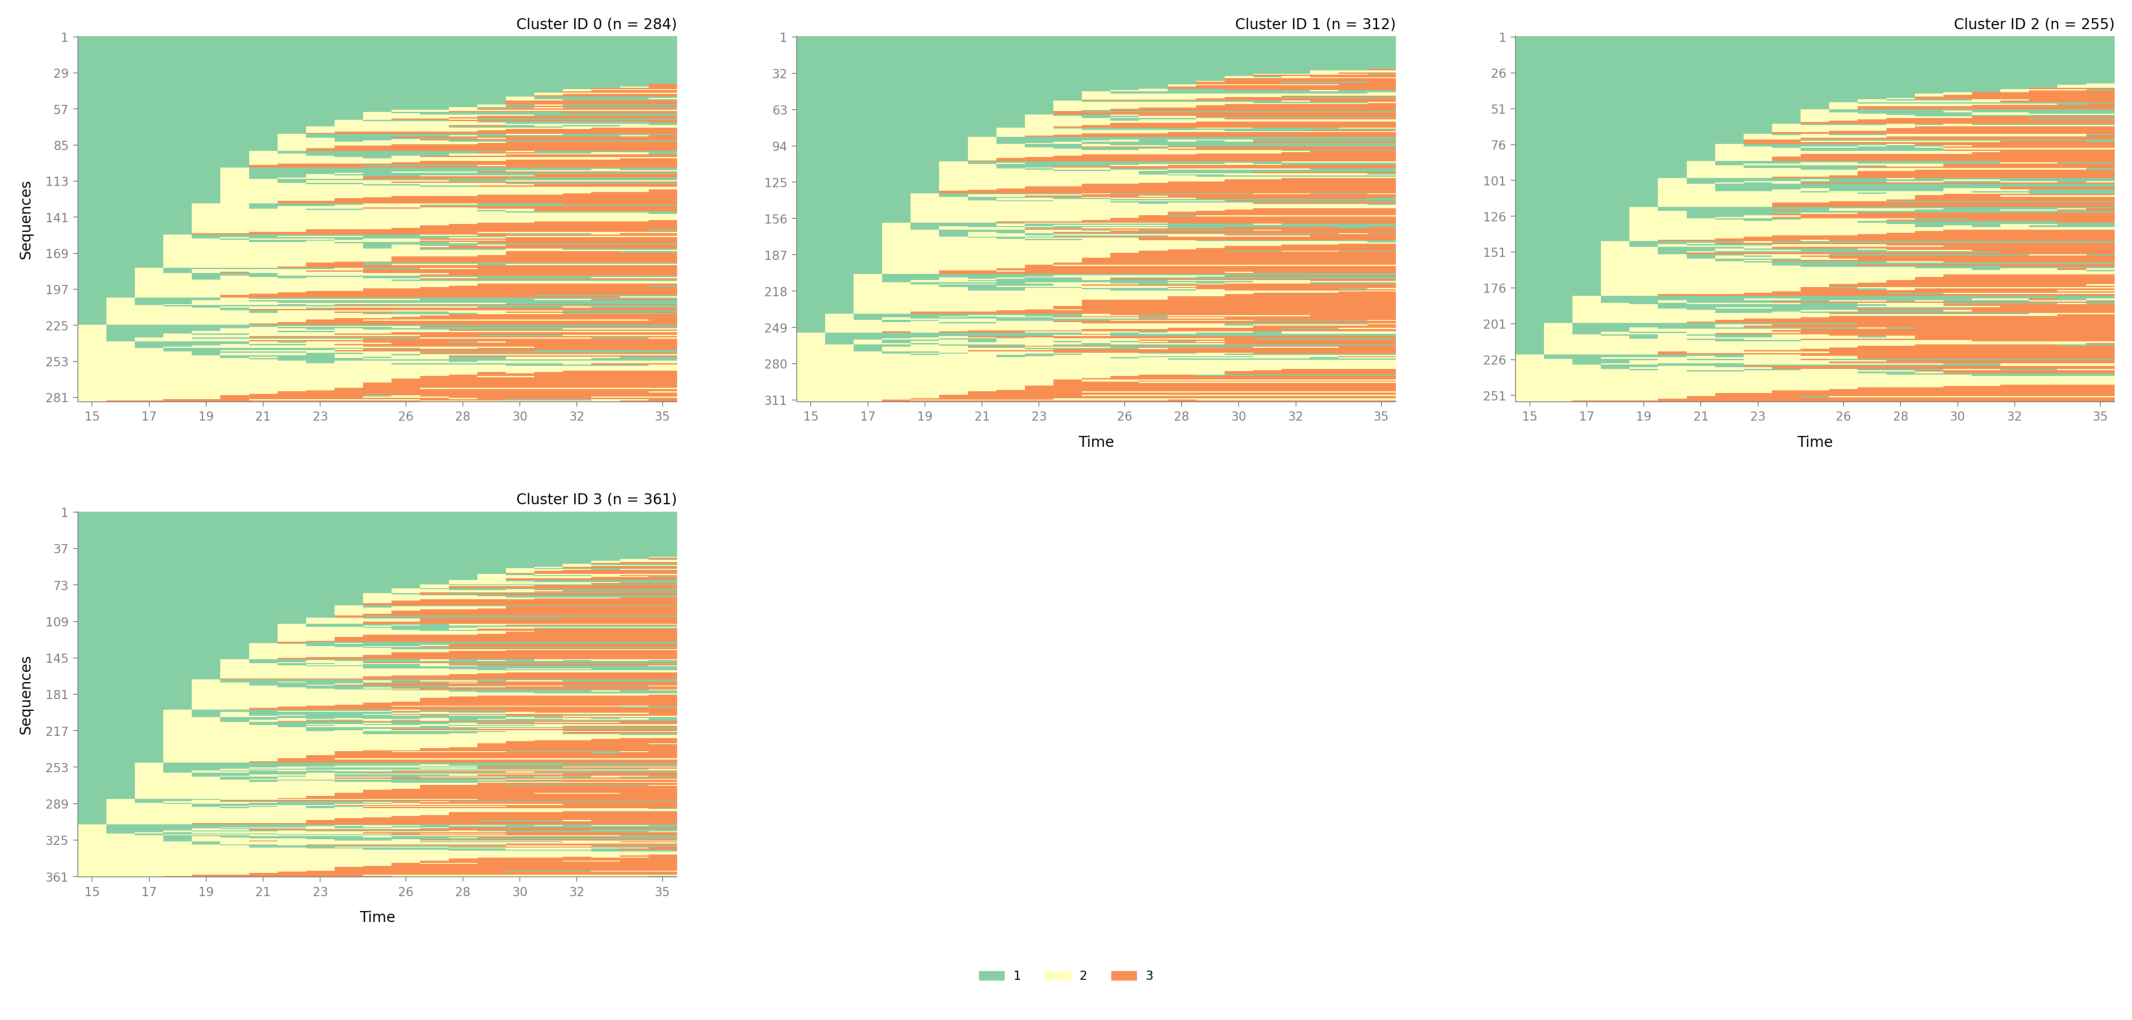

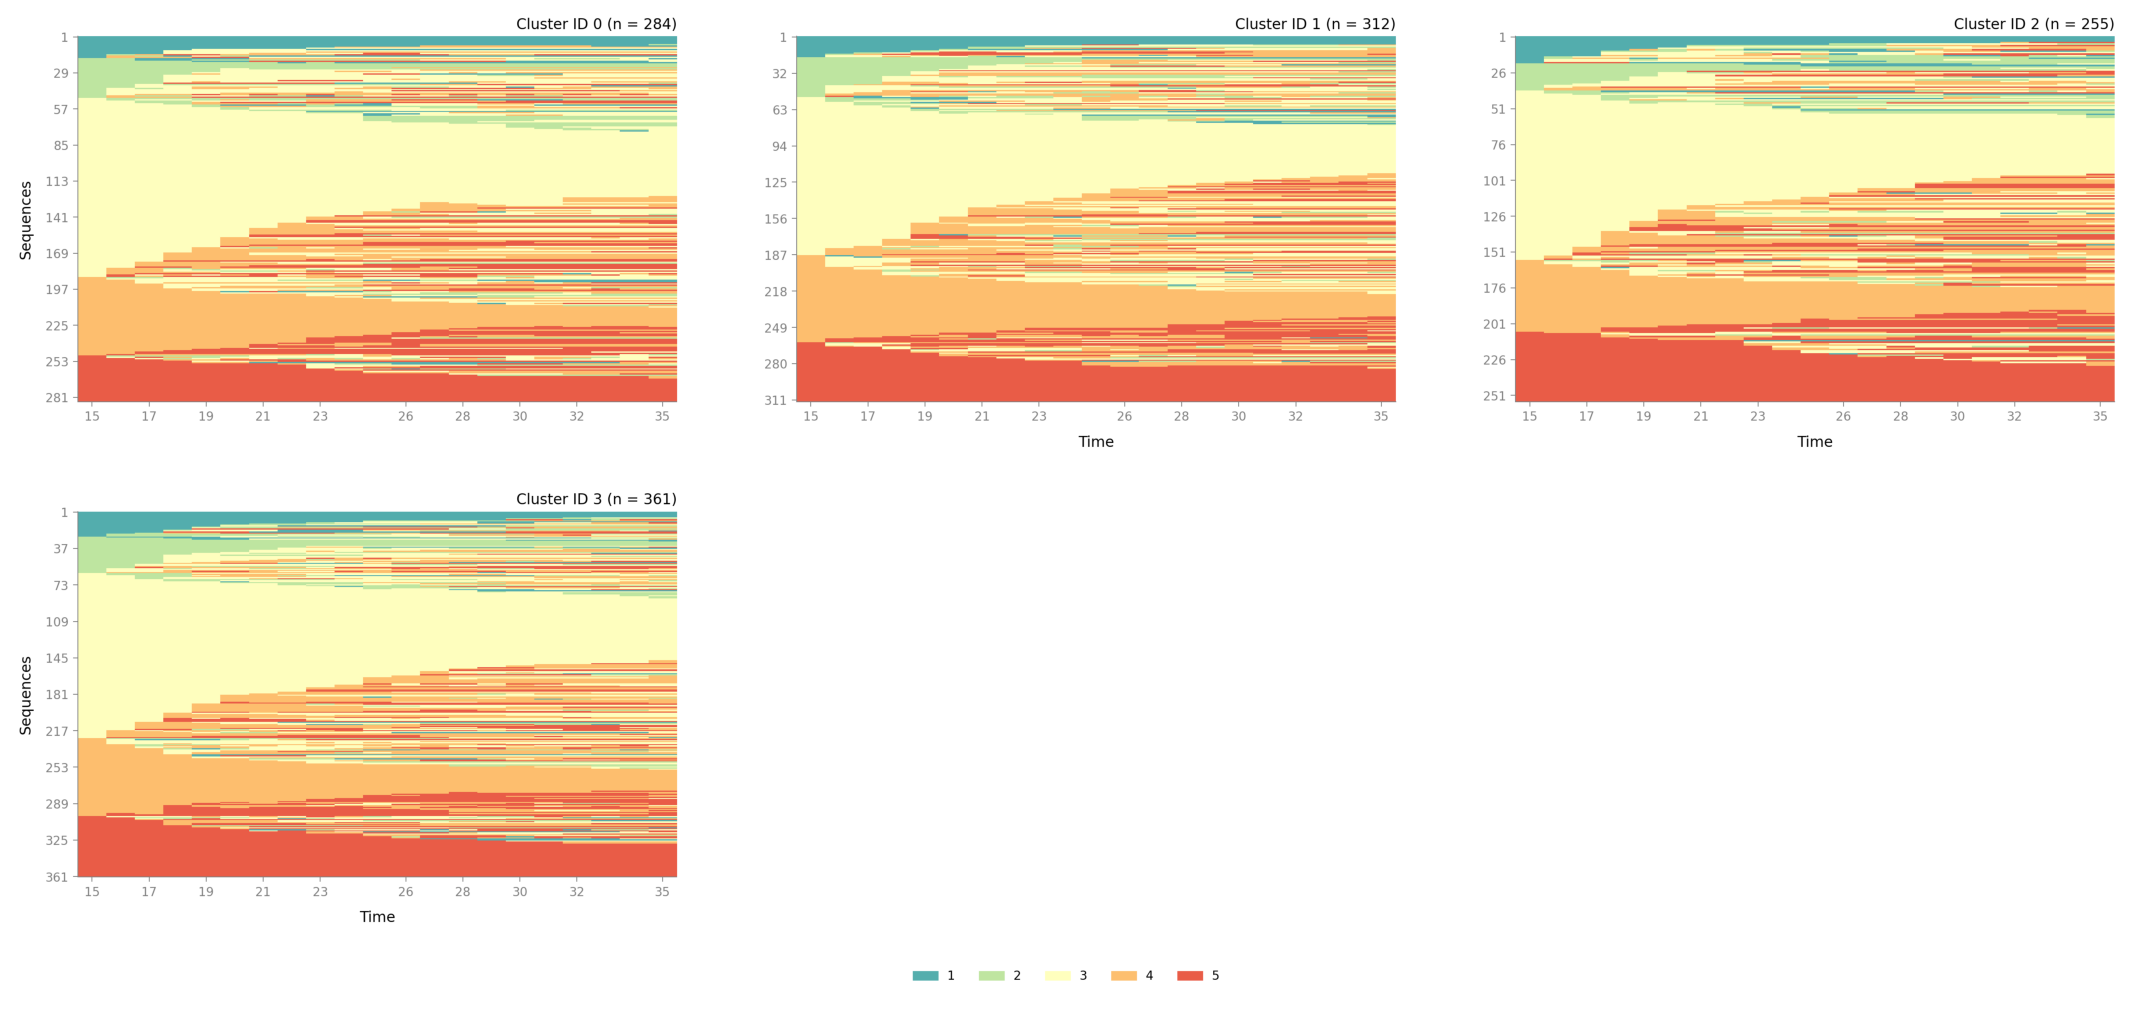

In [22]:
# ÊûÑÂª∫ DataFrame
ward_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    save_as='ward_family_plot')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    save_as='ward_happiness_plot')
